# Best First Search Algorithm
The Best First Search is a graph search algorithm based on a priority queue, called **frontier**, that holds the possible nodes corresponding to a given goal. Whether the current node is the goal or must be expanded is decided according to a heuristic, if is the informed version of the algorithm, or to a blind policy like: FIFO, LIFO or Uniform Cost.

This algorithm generalize the concept of searching for a goal in graph, indeed, in the same pseudocode there are BFS, DFS and Dijkstra depending on the chosen blind policy of extraction. When a heuristic is added and minor changes are implemented, the algorithm becomes A-star. Let's look up at the code.

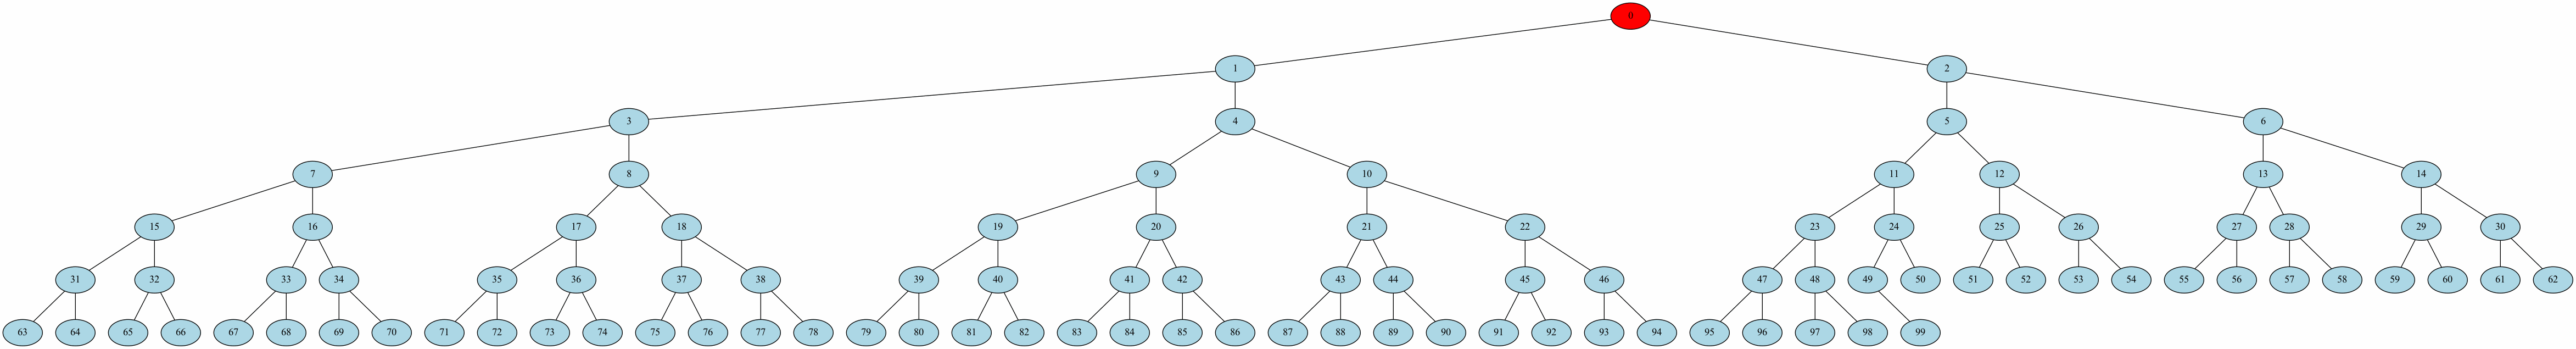

In [4]:
import pygraphviz as pgv
import imageio.v2 as imageio
from IPython.display import Image, display
n_nodes = 100
edges = []
for i in range(n_nodes):
    left = 2 * i + 1
    right = 2 * i + 2
    if left < n_nodes:
        edges.append((i, left))
    if right < n_nodes:
        edges.append((i, right))

G = {n: [] for n1, n2 in edges for n in (n1, n2)}
for u, v in edges:
    G[u].append(v)
    G[v].append(u)

visited = []
queue = [0]
frames = []

step = 0
while queue:
    node = queue.pop(0)
    if node not in visited:
        visited.append(node)

        A = pgv.AGraph(directed=False)
        A.add_edges_from(edges)

        for n in A.nodes():
            if int(n) in visited:
                n.attr['style'] = 'filled'
                n.attr['fillcolor'] = 'red'
            else:
                n.attr['style'] = 'filled'
                n.attr['fillcolor'] = 'lightblue'

        fname = f"images/graphviz_step_{step}.png"
        A.layout(prog="dot")
        A.draw(fname)
        frames.append(fname)
        step += 1

        for neighbor in G[node]:
            if neighbor not in visited:
                queue.append(neighbor)

gif_path = "images/bfs_graphviz.gif"
with imageio.get_writer(gif_path, mode="I", duration=10, loop=0) as writer:
    for f in frames:
        writer.append_data(imageio.imread(f))

display(Image(filename=gif_path))
